## 思考题
1. **primitives 和 container的区别和联系是什么？**\
    `Artist`包含两种对象：`基本要素-primitives` 和 `容器-containers`。  
    `primitives`是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如曲线Line2D，文本text，矩形Rectangle，图像image等。  
    `container`是容器，即用来装基本要素的地方，包括**图形figure、坐标系Axes和坐标轴Axis**另，低层次的容器可以放在高层次的容器中
 
2. **四个容器的联系和区别是么？他们分别控制一张图表的哪些要素？**\
    * `matplotlib.figure.Figure`是`Artist`最顶层的`container`-对象容器，它包含了图表中的所有元素。一张图表的背景就是在`Figure.patch`的一个矩形`Rectangle`。向图表添加`Figure.add_subplot()`或者`Figure.add_axes()`元素时，这些都会被添加到`Figure.axes`列表中。
    * `matplotlib.axes.Axes`是matplotlib的核心。大量的用于绘图的`Artist`存放在它内部，并且它有许多辅助方法来创建和添加`Artist`给它自己，而且它也有许多赋值方法来访问和修改这些`Artist`。  和`Figure`容器类似，`Axes`包含了一个patch属性，对于笛卡尔坐标系而言，它是一个`Rectangle`；对于极坐标而言，它是一个`Circle`。这个patch属性决定了绘图区域的形状、背景和边框。
    * `matplotlib.axis.Axis`实例处理`tick line`、`grid line`、`tick label`以及`axis label`的绘制，它包括坐标轴上的刻度线、刻度`label`、坐标网格、坐标轴标题。
    * `matplotlib.axis.Tick`是从`Figure`到`Axes`到`Axis`到`Tick`中最末端的容器对象。  `Tick`包含了`tick`、`grid line`实例以及对应的`label`。 

## 题目
1. 教程中展示的案例都是单一图，请自行创建数据，**画出包含6个子图的线图**，要求：    
子图排布是 2 * 3 （2行 3列）；  
线图可用教程中line2D方法绘制；  
需要设置每个子图的横坐标和纵坐标刻度；
并设置整个图的标题，横坐标名称，以及纵坐标名称


Text(0.5, 0.98, 'lineshow')

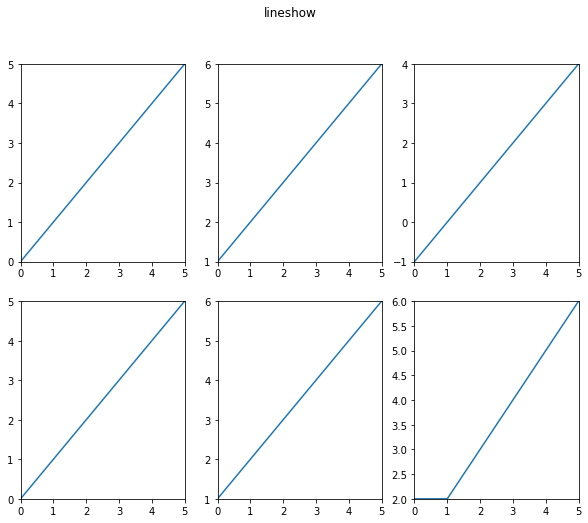

In [68]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D      
##可优化后续改
#最笨的方法
fig = plt.figure(figsize=(10, 8)) 

x = [0,1,2,3,4,5]
ax = fig.add_subplot(231)
y = x
line = Line2D(x, y)
ax.add_line(line)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
y=[i+1 for i in x]
line = Line2D(x, y)
ax = fig.add_subplot(232)
ax.add_line(line)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
y=[i-1 for i in x]
line = Line2D(x, y)
ax = fig.add_subplot(233)
ax.add_line(line)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

ax = fig.add_subplot(234)
y = x
line = Line2D(x, y)
ax.add_line(line)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

y=[1,2,3,4,5,6]
line = Line2D(x, y)
ax = fig.add_subplot(235)
ax.add_line(line)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
y=[2,2,3,4,5,6]
line = Line2D(x, y)
ax = fig.add_subplot(236)
ax.add_line(line)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
fig.suptitle('lineshow')

2. 分别用一组长方形柱和填充面积的方式模仿画出下图，函数 y = -1 * (x - 2) * (x - 8) +10 在区间[2,9]的积分面积
![](https://img-blog.csdnimg.cn/20201126105910781.png)
![](https://img-blog.csdnimg.cn/20201126105910780.png)

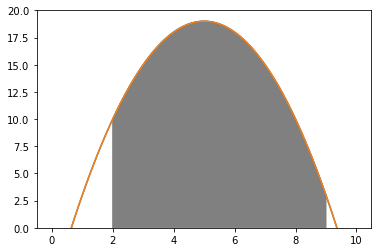

In [69]:
#后续补
import numpy as np
x = np.arange(0, 10, 0.01)
y = -1 * (x-2) * (x-8) + 10

plt.plot(x, y)
plt.ylim(0, 20)

idx = np.where( np.logical_and(x>=2, x<=9) )[0]

plt.plot(x, y)
plt.ylim(0, 20)
plt.fill([2] + list(x[idx]) + [9], [0] + list(y[idx]) + [0], color='grey')


该题需要继续研究 \
小矩形答案可参考 https://nbviewer.jupyter.org/github/blueloveTH/datawhale-fantastic-matplotlib/blob/main/Task02.ipynb

## 主要内容

### matplorlib三层api
matplotlib的原理或者说基础逻辑是，用Artist对象在画布(canvas)上绘制(Render)图形。\
三个层次的API：  
  
`matplotlib.backend_bases.FigureCanvas` 代表了绘图区，所有的图像都是在绘图区完成的  
`matplotlib.backend_bases.Renderer` 代表了渲染器，可以近似理解为画笔，控制如何在 FigureCanvas 上画图。  
`matplotlib.artist.Artist` 代表了具体的图表组件，即调用了Renderer的接口在Canvas上作图。  
前两者处理程序和计算机的底层交互的事项，第三项Artist就是具体的调用接口来做出我们想要的图，比如图形、文本、线条的设定。所以通常来说，我们95%的时间，都是用来和matplotlib.artist.Artist类打交道的。

### Artist的分类
Artist有两种类型：`primitives` 和`containers`。   
`primitive`是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如**曲线Line2D，文字text，矩形Rectangle，图像image**等。  
`container`是容器，即用来装基本要素的地方，包括**图形figure、坐标系Axes和坐标轴Axis**。他们之间的关系如下图所示：  
![分类](https://img-blog.csdnimg.cn/20201122230916134.jpeg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl8zODYwNDk2MQ==,size_16,color_FFFFFF,t_70#pic_center)  

### matplotlib标准用法
matplotlib的标准使用流程为：  
1. 创建一个`Figure`实例
2. 使用`Figure`实例创建一个或者多个`Axes`或`Subplot`实例
3. 使用`Axes`实例的辅助方法来创建`primitive`  



### primitives

#### 2DLines
在matplotlib中曲线的绘制，主要是通过类 `matplotlib.lines.Line2D` 来完成的。   
它的基类: `matplotlib.artist.Artist`   
  
matplotlib中`线-line`的含义：它表示的可以是连接所有顶点的实线样式，也可以是每个顶点的标记。此外，这条线也会受到绘画风格的影响，比如，我们可以创建虚线种类的线。

>```
class matplotlib.lines.Line2D(xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)
>``

其中常用的的参数有：  
+ **xdata**:需要绘制的line中点的在x轴上的取值，若忽略，则默认为range(1,len(ydata)+1)
+ **ydata**:需要绘制的line中点的在y轴上的取值
+ **linewidth**:线条的宽度
+ **linestyle**:线型
+ **color**:线条的颜色
+ **marker**:点的标记，详细可参考[markers API](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
+ **markersize**:标记的size
  
其他详细参数可参考[Line2D官方文档](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#examples-using-matplotlib-lines-line2d)

#### patches
matplotlib.patches.Patch类是二维图形类。它的基类是matplotlib.artist.Artist，它的构造函数：  
详细清单见 [matplotlib.patches API](https://matplotlib.org/api/patches_api.html)  
  
  

>Patch(edgecolor=None, facecolor=None, color=None,
  linewidth=None, linestyle=None, antialiased=None,
  hatch=None, fill=True, capstyle=None, joinstyle=None,
  **kwargs)

#### collections
collections类是用来绘制一组对象的集合，collections有许多不同的子类，如RegularPolyCollection, CircleCollection, Pathcollection, 分别对应不同的集合子类型。其中比较常用的就是散点图，它是属于PathCollection子类，scatter方法提供了该类的封装，根据x与y绘制不同大小或颜色标记的散点图。 它的构造方法：
  
>Axes.scatter(self, x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
      
      
其中最主要的参数是前5个：  
+ **x**：数据点x轴的位置  
+ **y**：数据点y轴的位置  
+ **s**：尺寸大小  
+ **c**：可以是单个颜色格式的字符串，也可以是一系列颜色  
+ **marker**: 标记的类型  


####  images
images是matplotlib中绘制image图像的类，其中最常用的imshow可以根据数组绘制成图像，它的构造函数：
>class matplotlib.image.AxesImage(ax, cmap=None, norm=None, interpolation=None, origin=None, extent=None, filternorm=True, filterrad=4.0, resample=False, **kwargs)
  
imshow根据数组绘制图像
>matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs）

使用imshow画图时首先需要传入一个数组，数组对应的是空间内的像素位置和像素点的值，interpolation参数可以设置不同的差值方法，具体效果如下。

### 对象容器 - Object container
容器会包含一些`primitives`，并且容器还有它自身的属性。  
比如`Axes Artist`，它是一种容器，它包含了很多`primitives`，比如`Line2D`，`Text`；同时，它也有自身的属性，比如`xscal`，用来控制X轴是`linear`还是`log`的。
* Figure容器
* Axes容器
* Axis容器
* Tick容器